**PROYECTO FINAL MINERIA DE DATOS**

**Integrantes:**

* Angel
* Diego
* Felipe
* Jair Salvador
* José
* Yahir




In [ ]:
#Importar Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from pandas.core.arrays import categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Cargar el DataSet
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv')

#Ver el Dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#Mostrar información del dataset
print("\nTamaño del dataset:")
print(df.shape)

print("\nColumnas:")
print(df.columns.to_list)

print("\nTipos de datos del dataset:")
print(df.dtypes)

print("\nInformación del dataset:")
print(df.info())




Tamaño del dataset:
(1000, 8)

Columnas:
<bound method IndexOpsMixin.tolist of Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')>

Tipos de datos del dataset:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of edu

**INFORMACIÓN GENERAL DEL DATASET**

* Tamaño: 1,000 registros de estudiantes y 8 variables iniciales

* Variables: 5 categóricas y 3 numéricas (puntajes en matemáticas, lectura y escritura)



In [ ]:
#Estadisticos básicos del DF
print("\nDescripción estadística del dataset:")
print(df.describe())

#Estadisticos básicos del DF Transversal
print("\nDescripción estadística del dataser de forma T")
print(df.describe().T)

#Comprobar si existen valores nulos en todo el df
print("\nValores nulos del dataset:")
print(df.isnull().sum())

#Comprobar si existen valores nulos n las variables
print("\nValores nulos n de las varibles:")
df.isnull().sum()


Descripción estadística del dataset:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Descripción estadística del dataser de forma T
                count    mean        std   min    25%   50%   75%    max
math score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0
reading score  1000.0  69.169  14.600192  17.0  59.00  70.0  79.0  100.0
writing score  1000.0  68.054  15.195657  10.0  57.75  69.0  79.0  100.0

Valores nulos del dataset:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course       

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


**Variables del Dataset**

In [ ]:
# Variables numericas
num_cols= ['math score', 'reading score', 'writing score']

# Variables categegoricas
cat_cols= ['gender', 'race/ethnicity',
           'parental level of education', 'lunch',
           'test preparation course']

print(f"Variables numéricas: {num_cols}")
print(f"Variables categóricas: {cat_cols}")

Variables numéricas: ['math score', 'reading score', 'writing score']
Variables categóricas: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#**1.1 RESUMEN ESTADÍSTICO**

1.1 Revisión de valores faltantes, outliers y consistencia de datos.


* **Valores faltantes**

In [ ]:
#Revision de Datos faltantes (Not-null) en el dataset

print('\nValores faltantes: ')
df.isnull().sum()


Valores faltantes: 


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


**No existen valores faltantes en el dataset**

* **Outliders**

In [ ]:
# Comprobar si existen Outliders (Valores Atipicos)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Para comprarobar si existen Outliders, debemos comprobar si exten variables númericas. Se encontraron las siguientes variables númericas (int64)

* math score
* reading score
* writing score

Si bien a simple vista en el DataSet se peude comprobar que en efecto son variables númericas es importante comprobar que realmetne son variables númericas y no numeros de tipo Object

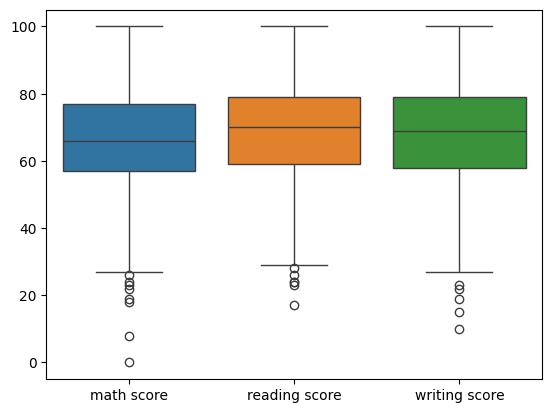

In [ ]:
# Graficar BoxPlot(Diagrama de Cajas)
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.show()

In [ ]:
# Creamos un DF para poder comprobar con mayor presicion cuales son los Outliders
outliers_df = pd.DataFrame({
"math score": df["math score"].nsmallest(15).values,
"reading score": df["reading score"].nsmallest(15).values,
"writing score": df["writing score"].nsmallest(15).values
})
outliers_df

,math score,reading score,writing score
0,0,17,10
1,8,23,15
2,18,24,19
3,19,24,22
4,22,26,23
5,23,28,27
6,24,29,27
7,26,29,27
8,27,31,28
9,27,31,30


Aunque el análisis descriptivo inicial mediante describe() mostraba la existencia de algunos puntajes bajos, no era suficiente para confirmar la presencia de valores atípicos.

Al generar el boxplot se confirma una existenia de Valores Atipicos, encontrados todos en valores minimos, en abse a esta observacion se creo un DataFrame con los valores mínimos de cada variable, se identificaron varios outliers correspondientes a puntajes bajos, los cuales representan estudiantes con desempeño académico significativamente menor al
promedio, pero dentro del rango válido.

* Math Score Se identifican alrededor de 14 valores atípicos, con puntajes que van desde 0 hasta 29. El puntaje mínimo es 0, indicando ausencia total de aciertos.
* Reading Score: Presenta menos valores atípicos que Math Score. Los valores considerados outliers se sitúan entre 17 y 32 puntos.
* Writing Score: Se identifican aproximadamente 8 valores atípicos, con puntajes en el rango de 10 a 28.

Estos valores, aunque extremos, son completamente válidos dentro de la escala del examen. Su presencia indica que los estudiantes correspondientes presentan un desempeño significativamente inferior al promedio general, pero no representan errores de captura ni inconsistencias en los datos

* **Constencia de datos**

In [ ]:
# Revisar si exisen filas repetidas
df.duplicated().sum()


np.int64(0)

In [ ]:
# Comprobar si unicamente estan los generes de Femenino, Masculino
df['gender'].unique()


array(['female', 'male'], dtype=object)

Se realizó una revisión de consistencia de datos con el objetivo de asegurar que el dataset no presentara valores anómalos o incoherentes. Primero, se verificó la ausencia de registros duplicados, confirmando que cada observación era única. Posteriormente, se revisaron las categorías presentes en las variables categóricas "como gender" para comprobar que
solo existieran valores válidos.

No fue necesaria una comprobación adicional de rangos para las calificaciones, ya que el análisis descriptivo mediante describe() mostró que los puntajes mínimos y máximos se encontraban dentro del intervalo permitido (0 a 100). Esta misma conclusión fue respaldada por las visualizaciones en los boxplots, donde no se observaron valores fuera del rango
esperado

**1.1.2 Estadísticas descriptivas de todas las variables numéricas**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


**Medidas de Tendencia Central**

In [ ]:
promedio_matematicas = df["math score"].mean()
mediana_matematicas = df["math score"].median()
moda_matematicas = df["math score"].mode()[0]

promedio_lectura = df["reading score"].mean()
mediana_lectura = df["reading score"].median()
moda_lectura = df["reading score"].mode()[0]

promedio_escritura = df["writing score"].mean()
mediana_escritura = df["writing score"].median()
moda_escritura = df["writing score"].mode()[0]

lista_tendencias_centrales = ["Media", "Mediana", "Moda"]
dataframe_tendencias = pd.DataFrame({
    "Matematicas": [promedio_matematicas, mediana_matematicas, moda_matematicas],
    "Lectura": [promedio_lectura, mediana_lectura, moda_lectura],
    "Escritura": [promedio_escritura, mediana_escritura, moda_escritura]
}, index=lista_tendencias_centrales)

dataframe_tendencias

,Matematicas,Lectura,Escritura
Media,66.089,69.169,68.054
Mediana,66.000,70.000,69.000
Moda,65.000,72.000,74.000


A partir de los estadísticos descriptivos de math score, reading score y writing score, se observa que, aunque existen calificaciones sobresalientes donde algunos estudiantes alcanzan el puntaje máximo de 100 en las tres asignaturas, el rendimiento promedio del grupo se sitúa entre 66 y 68 puntos. Esto indica que, en términos generales, la mayoría de los alumnos
aprueba las materias, pero lo hace con calificaciones moderadas del minimo aprobatorio.

La asignatura con mejor desempeño promedio es Lectura, con una media aproximada de 70 puntos. Además, presenta una moda de 74, lo que sugiere que un número considerable de estudiantes tiende a obtener calificaciones en ese rango, reflejando un desempeño relativamente más sólido en comprensión lectora.

Por otro lado, Matemáticas es la asignatura donde los estudiantes muestran el promedio más bajo (66 puntos). Esto sugiere la necesidad de fortalecer estrategias de apoyo académico en esta área, ya que presenta mayor variabilidad y un número más alto de calificaciones bajas en comparación con las otras dos materias.


**Recuento y distribución de categorías para variables categóricas.**
1. gender
2. race/ethnicity
3. parental level of education
4. lunch
5. test preparation course

In [ ]:
# Variables categóricas (Recuento y distribución)
print(f'\nVariables categóricas: ')
categorical_cols=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
  print(f"\n{col}:")
  print(df[col].value_counts())




Variables categóricas: 

gender:
gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course:
test preparation course
none         642
completed    358
Name: count, dtype: int64


**Género:** Casi equitativo (51.8% femenino, 48.2% masculino).

**Grupo Étnico:** Grupo C es el más representado (31.9%), grupo A el menos (8.9%).

**Educación Parental:** La mayoría tiene educación media o superior incompleta (solo 17.7% con educación universitaria completa).

**Almuerzo**: 64.5% estándar, 35.5% gratis/reducido (posible proxy de nivel socioeconómico).

**Curso de Preparación:** Solo 35.8% completó el curso.

**Hallazgos:**
* Diversidad demográfica y socioeconómica en la muestra.
* Baja finalización del curso de preparación, lo que sugiere una oportunidad de mejora.
* El contexto educativo familiar puede influir en el rendimiento.

# **1.2 VISUALIZACIÓN DE DATOS**

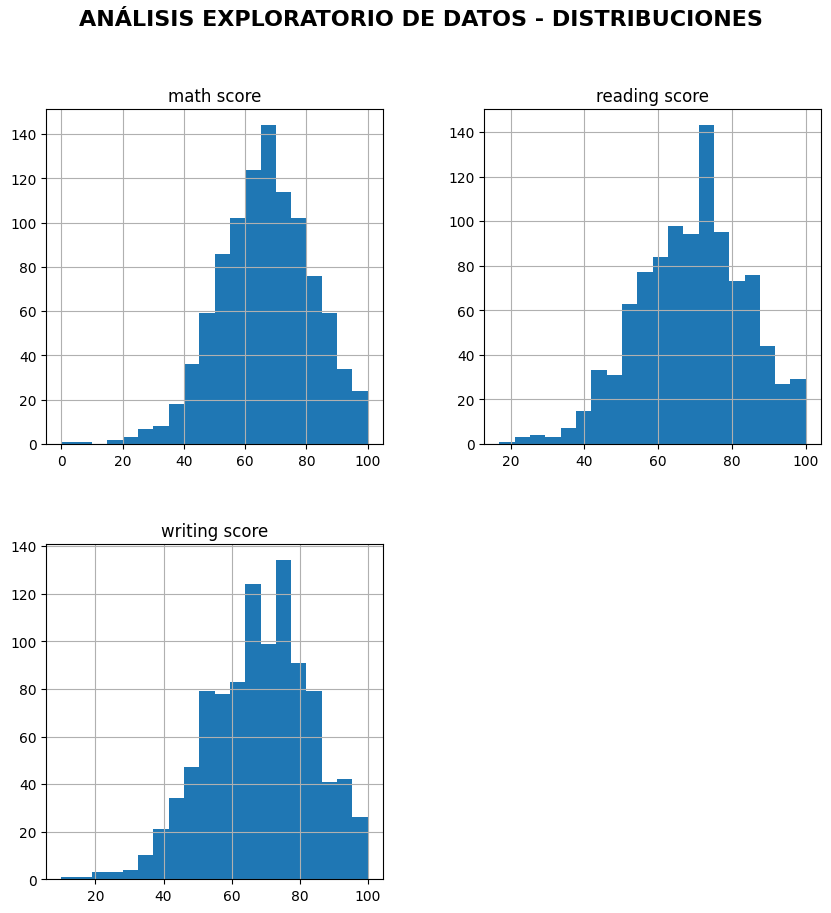

In [ ]:
# Histograma (Variables númericas)
df.hist(bins=20, figsize=(10, 10))
plt.suptitle('ANÁLISIS EXPLORATORIO DE DATOS - DISTRIBUCIONES', fontsize=16, fontweight='bold')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.show()


INTERPRETACIÓN
* Math score: distribución casi normal, ligeramente sesgada a la izquierda, con concentración entre 50–80 y algunos outliers bajos.

* Reading score: distribución simétrica, pico cerca de 70 y pocos valores extremos.

* Writing score: similar a lectura, algo más dispersa y con forma aproximadamente normal.

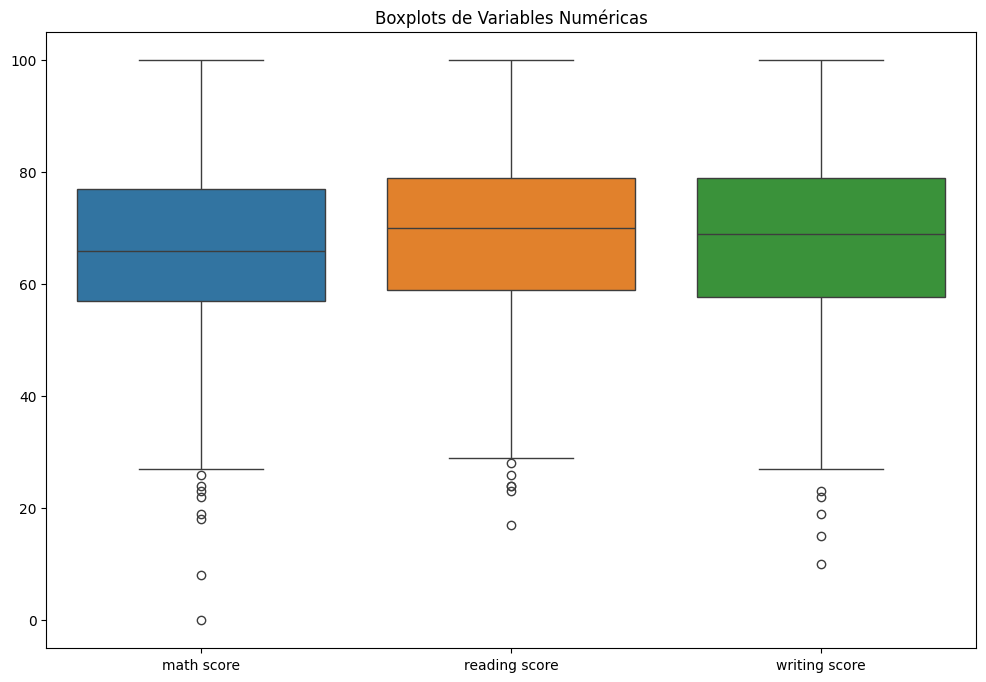

In [ ]:
# Gráficar Boxplots (detección de outliers)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='v')
plt.title('Boxplots de Variables Numéricas')
plt.show()


INTERPRETACIÓN:

**Math Score (Calificación de Matemáticas):**
* Tiene la mediana más baja de las tres materias.
* Presenta varios puntos por debajo del bigote inferior, lo que indica la presencia de outliers (valores atípicos bajos), esto significa que hay estudiantes con calificaciones excepcionalmente bajas en matemáticas.

* La caja (que representa el 50% central de los datos) está en una posición más baja compared to las otras.

**Reading Score (Calificación de Lectura):**

- Tiene una mediana más alta que matemáticas.
- Presenta menos outliers que matemáticas, y estos están también en la parte baja.
- La caja está más centrada en el rango de calificaciones.

**Writing Score (Calificación de Escritura):**
- Similar a reading score, con una mediana alta y pocos outliers.
- La distribución es bastante similar a reading, lo que sugiere que los estudiantes que tienen buen desempeño en lectura también lo tienen en escritura.

**Conclusiones:**
- Los estudiantes tienden a tener un desempeño más bajo en matemáticas que en lectura y escritura.
- Hay más estudiantes con calificaciones extremadamente bajas en matemáticas.
- Lectura y escritura están más equilibradas y tienen menos variabilidad extrema.

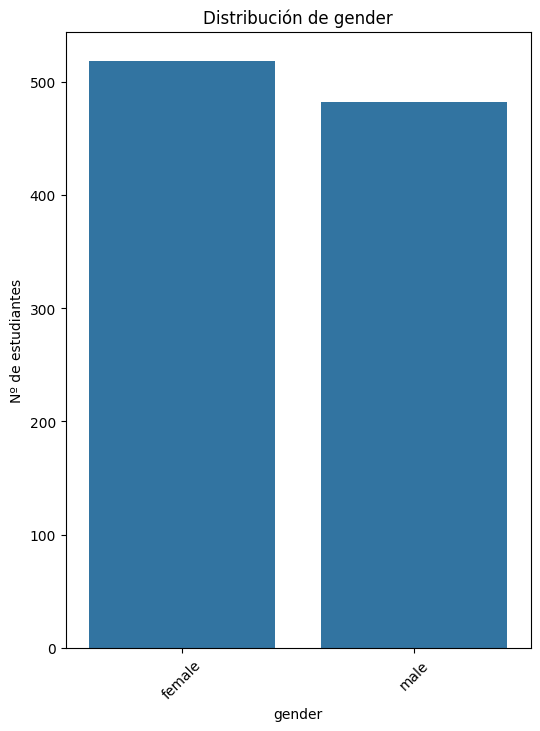

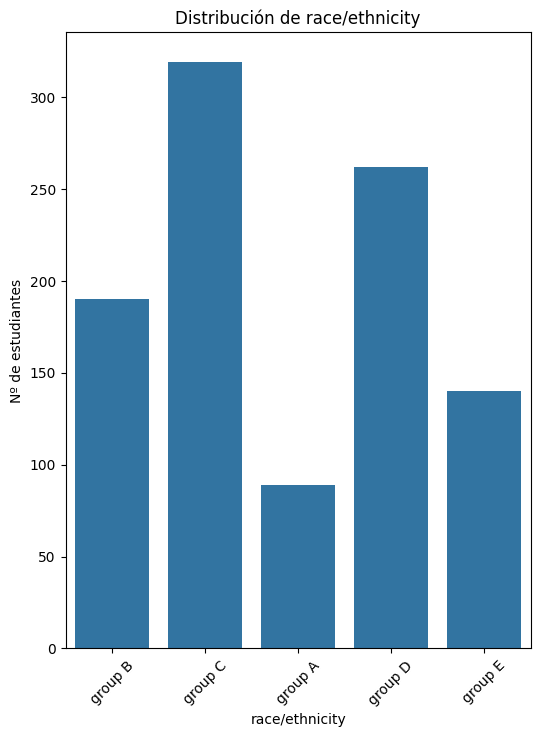

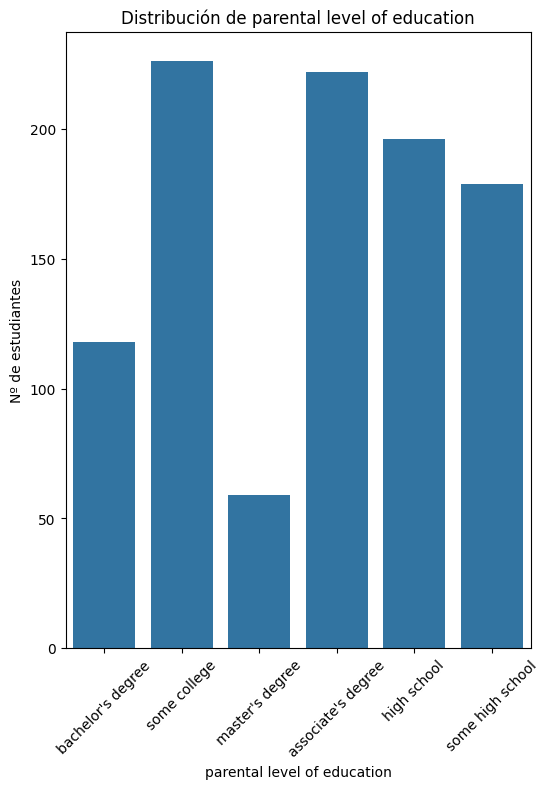

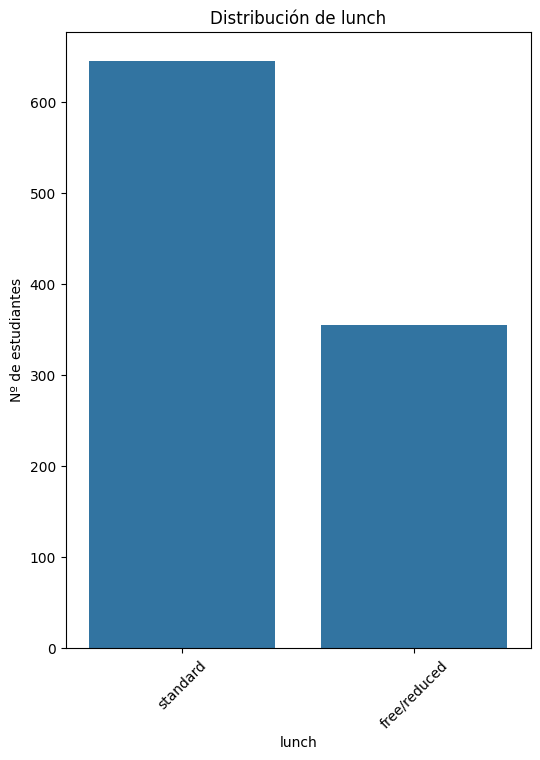

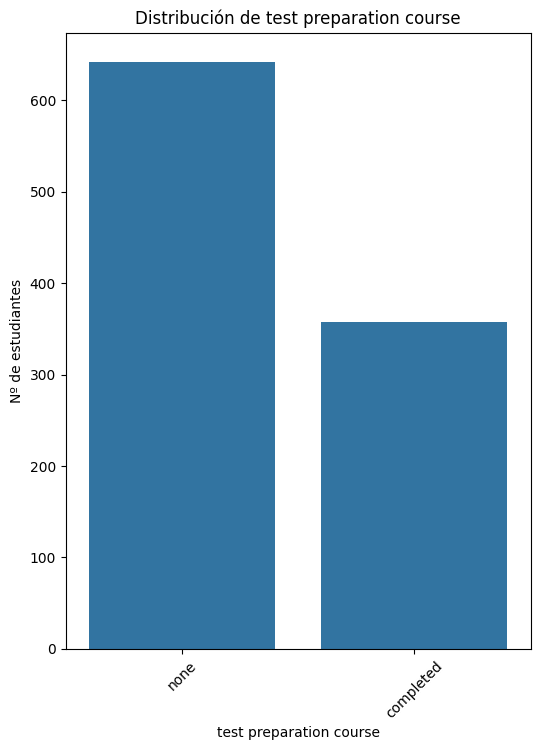

In [ ]:
# Gráficos de barras (variables categóricas)
for col in df.select_dtypes(include='object'):
    plt.figure(figsize=(6,8))
    sns.countplot(x=df[col])
    plt.title(f"Distribución de {col}")
    plt.ylabel("Nº de estudiantes") #Frencuencia
    plt.xticks(rotation=45)
    plt.show()



**Género:**
Distribución más o menos balanceada: 518 mujeres (51.8%) y 482 hombres (48.2%)

**Grupo étnico:**
* Grupo C: 32.9% (mayoría)
* Grupo D: 26.2%
* Grupo B: 19.0%
* Grupo E: 14.0%
* Grupo A: 8.9% (minoría)

**Nivel educativo parental:**
* Some college: 22.6% (más frecuente)
* Associate's degree: 22.2%
* High school: 19.6%
* Some high school: 17.9%
* Bachelor's degree: 11.8%
* Master's degree: 5.9% (menos frecuente)

**Almuerzo:**
* Standard: 64.5%
* Free/reduced: 35.5%

**Curso de preparación:**
* Ninguno: 64.2%
* Completado: 35.8%

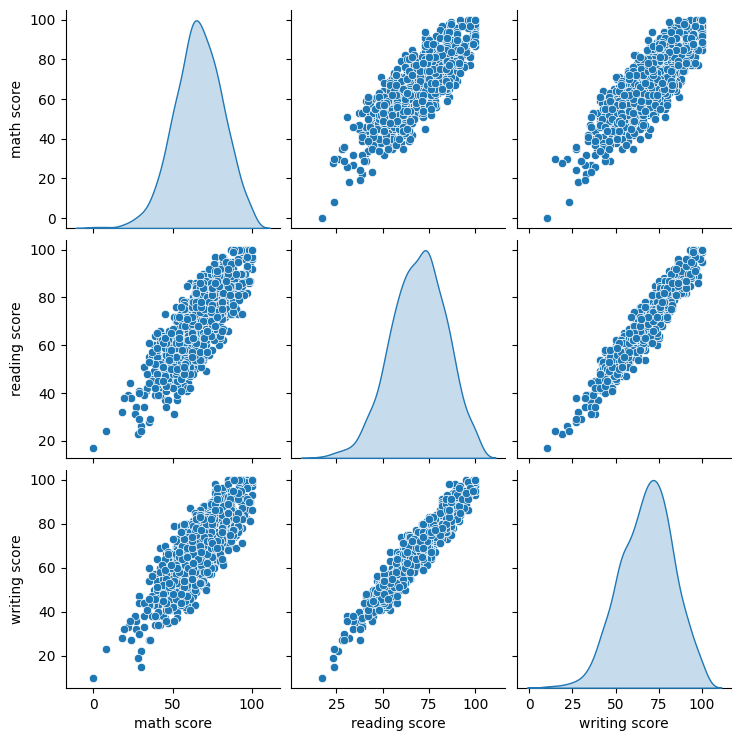

In [ ]:
# Diagramas de dispersión (relación entre pares numéricos)
sns.pairplot(df.select_dtypes(include='number'), diag_kind='kde')
plt.show()


DIAGONAL (Gráficos KDE):
- math score: Distribución más amplia, pico alrededor de 65
- reading score: Distribución más concentrada, pico en 70
- writing score: Similar a reading pero ligeramente desplazada

FUERA DE LA DIAGONAL (Scatter plots):
math vs reading:
  - Relación positiva fuerte
  - Puntos siguen línea diagonal ascendente
  - A mejor math score, mejor reading score

math vs writing:
  - Relación positiva fuerte
  - Patrón similar a math-reading
  - Dispersión ligeramente mayor

reading vs writing:
  - Relación MÁS FUERTE de todas
  - Puntos casi forman línea recta
  - Correlación casi perfecta


CONCLUSIONES:
- **Habilidades correlacionadas**: Buen desempeño en un área predice buen desempeño en otras
- **Reading-Writing**: La relación más fuerte (0.95) - habilidades de lenguaje conectadas
- **Math**: Aunque correlacionada, muestra más variabilidad individual


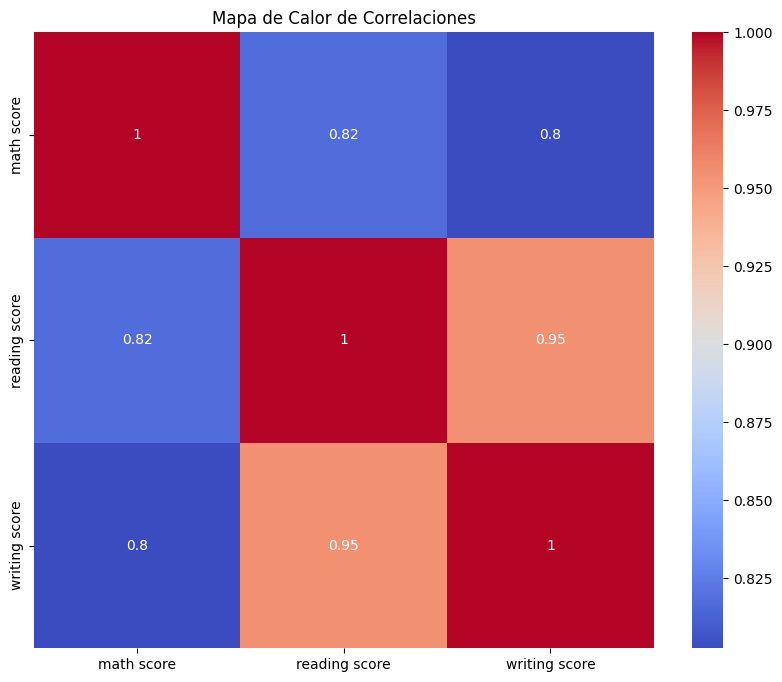

In [ ]:
# Mapa de calor de correlación
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Correlaciones")
plt.show()



**Interpretación:**

**Lectura y Escritura: 0.95**
Esta es la correlación más fuerte. Indica que los estudiantes que obtienen buenas calificaciones en lectura casi siempre obtienen buenas calificaciones en escritura también. Son habilidades que van muy unidas.

**Matemáticas y Lectura: 0.82**

**Matemáticas y Escritura: 0.80**

Muestran que los estudiantes con buen desempeño en matemáticas tienden a tener buen desempeño en las materias de lenguaje, aunque la relación no es tan fuerte como entre lectura y escritura.

**Conclusion principal:**
Muestra que los estudiantes con buen desempeño en matemáticas tienden a tener buen desempeño en las materias de lenguaje, aunque la relación no es tan fuerte como entre lectura y escritura.

# **1.3 GENERAR NUEVAS VARIABLES**

- **Promedio final**

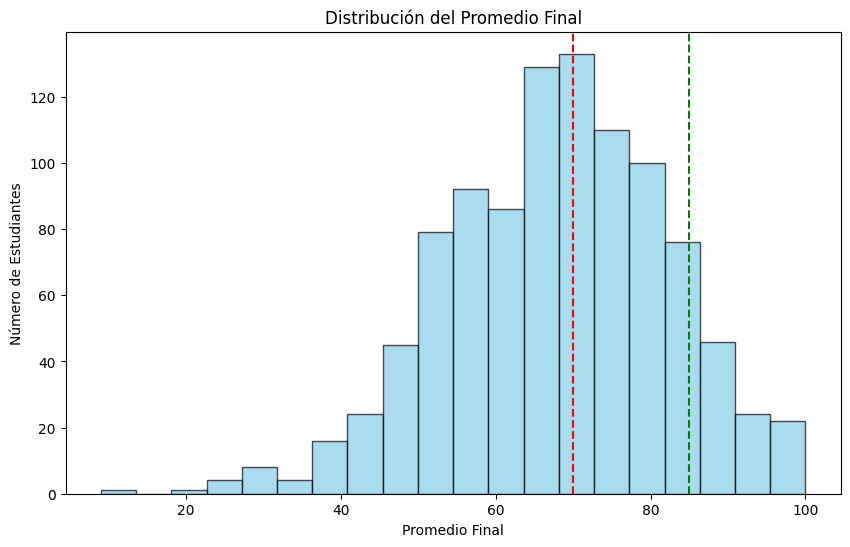

In [ ]:
# Promedio final
df['promedio_final'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

plt.figure(figsize=(10, 6))
plt.hist(df['promedio_final'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=70, color='red', linestyle='--', label='Umbral Aprobación (70)')
plt.axvline(x=85, color='green', linestyle='--', label='Umbral Alto Desempeño (85)')
plt.title('Distribución del Promedio Final')
plt.xlabel('Promedio Final')
plt.ylabel('Número de Estudiantes')
plt.show()

# Línea roja (70): Límite para aprobar
# Línea verde (85): Límite para alto desempeño

Lo que se observa:

- La mayoría de estudiantes tienen promedios entre 50 y 80 puntos
- El grupo más grande está alrededor de 65-75 puntos
- Hay pocos estudiantes con promedios muy bajos (menos de 40)
- También son pocos los que tienen promedios muy altos (más de 90)

- **Promedio de aprobados/reprobados (promedio >= 70)**

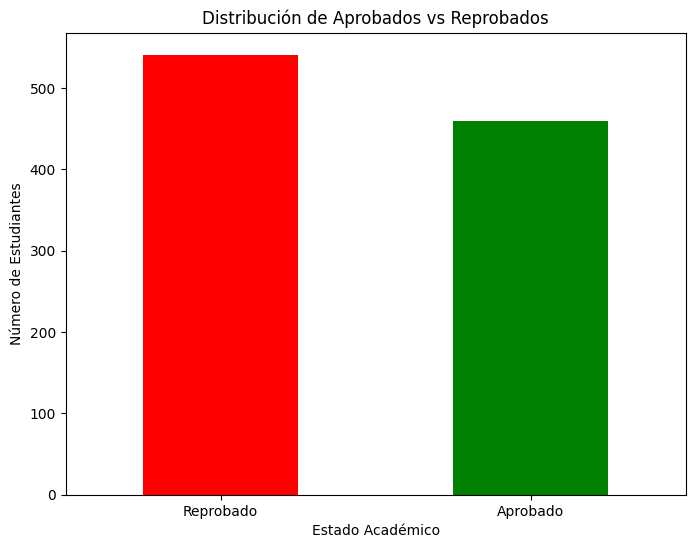

In [ ]:
# Aprobado/Reprobado (Umbral 70)
df['aprobado_reprobado'] = df['promedio_final'].apply(lambda x: 'Aprobado' if x >= 70 else 'Reprobado')

plt.figure(figsize=(8, 6))
df['aprobado_reprobado'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribución de Aprobados vs Reprobados')
plt.xlabel('Estado Académico')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)
plt.show()




Interpretación:
La gráfica muestra que hay más estudiantes reprobados que aprobados. Específicamente, el 54.1% de los estudiantes reprobaron (no alcanzaron el promedio de 70), mientras que solo el 45.9% aprobaron.

Conclusión:

Esto indica que la mayoría de los estudiantes no están cumpliendo con el
nivel académico esperado, hay un problema significativo en el rendimiento académico, ya que más de la mitad de los estudiantes no logran alcanzar el puntaje mínimo de aprobación.
Esto indica la necesidad urgente de implementar estrategias de mejora académica, como tutorías adicionales, revisión de métodos de enseñanza, o programas de apoyo estudiantil, para ayudar a los estudiantes a mejorar sus calificaciones y aumentar la tasa de aprobación.

- **Factores hábitos o condiciones del estudiante**

*(Lo manejamos asignando puntos dependiendo el hábito)*

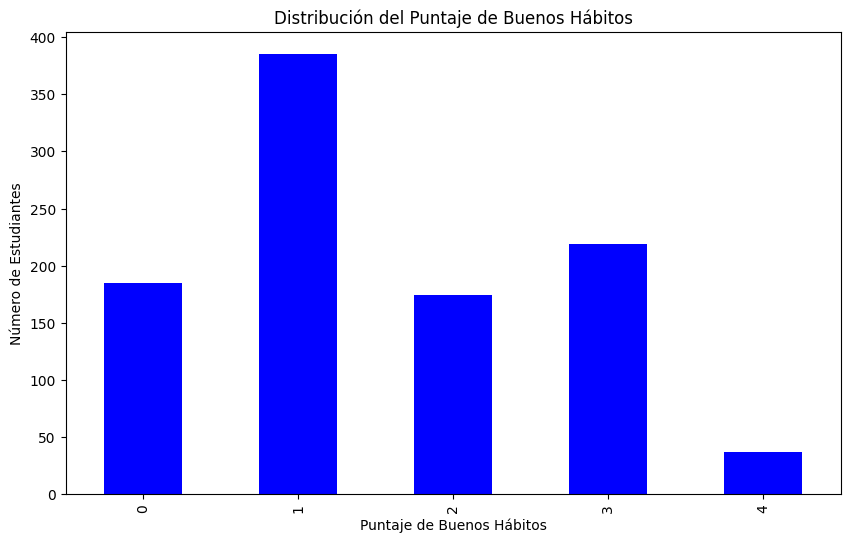

In [ ]:
# Puntuación de buenos hábitos (combinación de características positivas)
df['puntaje_buenos_habitos'] = 0 # NOTA: Calculamos un puntaje de buenos hábitos sumando factores positivos del estudiante por ejemplo: curso de preparación (2 pts), almuerzo estándar (1 pt) y alto nivel educativo de los padres (1 pt).
df['puntaje_buenos_habitos'] += (df['test preparation course'] == 'completed') * 2
df['puntaje_buenos_habitos'] += (df['lunch'] == 'standard') * 1
df['puntaje_buenos_habitos'] += df['parental level of education'].isin(["bachelor's degree", "master's degree"]) * 1

plt.figure(figsize=(10, 6))
df['puntaje_buenos_habitos'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Distribución del Puntaje de Buenos Hábitos')
plt.xlabel('Puntaje de Buenos Hábitos')
plt.ylabel('Número de Estudiantes')
plt.show()


INTERPRETACIÓN:

Esta gráfica muestra cuántos estudiantes tienen cada nivel de "buenos hábitos", donde el puntaje se calcula sumando:

- 2 puntos por curso de preparación completado
- 1 punto por almuerzo estándar
- 1 punto por padres con educación universitaria

Lo que se observa:
* Puntaje 1: Es el más común - muchos estudiantes tienen solo uno de estos factores favorables
* Puntaje 0: Grupo significativo - estudiantes sin ninguno de estos apoyos
* Puntaje 2 y 3: Cantidades moderadas - estudiantes con combinaciones de factores positivos
* Puntaje 4: Muy pocos - estudiantes con todos los factores a su favor

CONCLUSIÓN:
La mayoría de estudiantes carece de múltiples factores de apoyo académico, solo un pequeño grupo tiene acceso a todos los recursos que favorecen el buen desempeño (curso de preparación, buena alimentación y padres educados).

Esto explica en parte por qué tantos estudiantes reprueban enfrentan múltiples desventajas que afectan su rendimiento académico.

- **Alto desempeño**

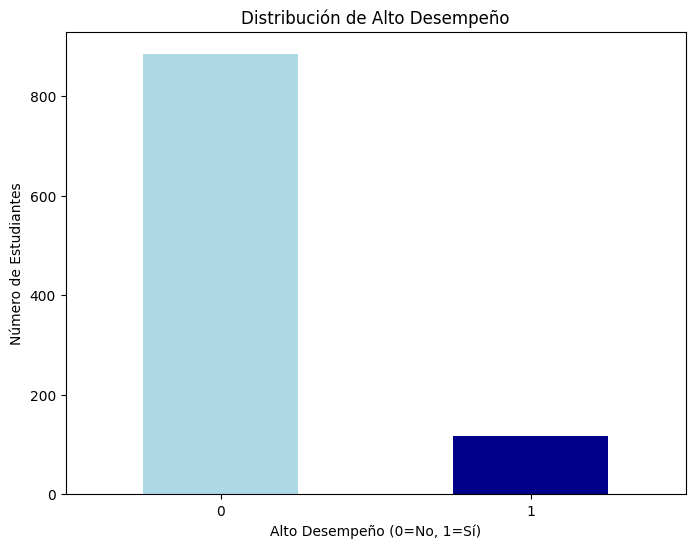

In [ ]:
# Alto desempeño académico (umbral 85 (Dependiendo, tengo duda))
df['alto_desempeño'] = (df['promedio_final'] >= 85).astype(int)

plt.figure(figsize=(8, 6))
df['alto_desempeño'].value_counts().plot(kind='bar', color=['lightblue', 'darkblue'])
plt.title('Distribución de Alto Desempeño')
plt.xlabel('Alto Desempeño (0=No, 1=Sí)')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)
plt.show()

INTERPRETACIÓN

Esta gráfica muestra cuántos estudiantes tienen un desempeño académico excepcional:

* Barra "0" (No): Estudiantes que NO tienen alto desempeño
* Barra "1" (Sí): Estudiantes que SÍ tienen alto desempeño (promedio ≥ 85)

Lo que se observa claramente:

* La barra del "0" es MUCHO más alta que la del "1"

*Esto significa que la gran mayoría de estudiantes no alcanza el nivel de excelencia*

*Solo un pequeño grupo de estudiantes sobresale con promedios muy altos*

CONCLUSIÓN:
Existe una brecha significativa en el rendimiento académicos, mientras la mayoría de estudiantes se encuentra en niveles regulares o bajos, solo un grupo reducido logra alcanzar la excelencia académica.

Podemos sugerir con esto la necesidad de implementar programas de enriquecimiento educativo para ayudar a más estudiantes a alcanzar su máximo potencial, además de seguir apoyando a quienes tienen dificultades.

- **Relación entre las condiciones del estudiante y su promedio final**

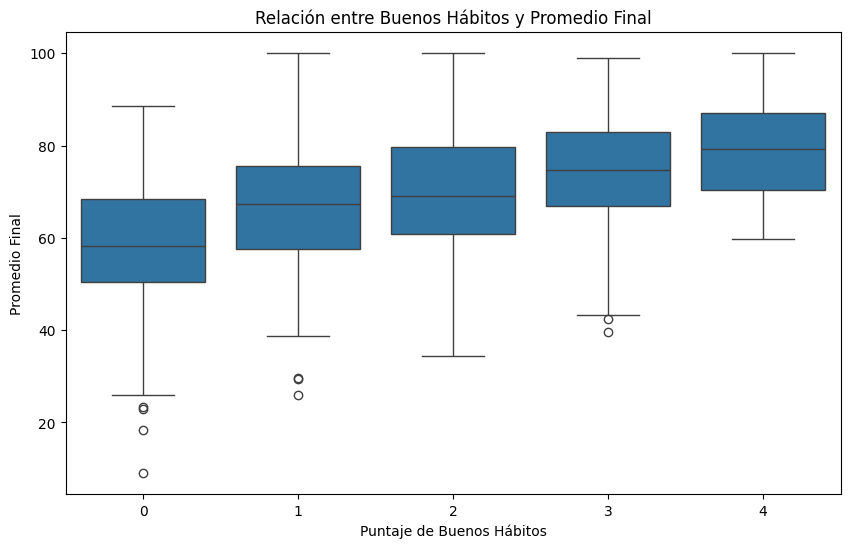

In [ ]:
# Relación entre Buenos Hábitos y Promedio Final
plt.figure(figsize=(10, 6))
sns.boxplot(x='puntaje_buenos_habitos', y='promedio_final', data=df)
plt.title('Relación entre Buenos Hábitos y Promedio Final')
plt.xlabel('Puntaje de Buenos Hábitos')
plt.ylabel('Promedio Final')
plt.show()

INTERPRETACIÓN:
- A medida que aumenta el puntaje de buenos hábitos, el promedio final también aumenta
- Los estudiantes con 0 puntos tienen los promedios más bajos
- Los estudiantes con 4 puntos tienen los promedios más altos

Lo que se observa:

* Puntaje 0: Promedios más bajos y mayor variabilidad (caja más grande)

* Puntaje 1 y 2: Mejora gradual en los promedios

* Puntaje 3 y 4: Los promedios más altos y consistentes

CONCLUSIÓN FINAL:
Existe una relación directa entre los factores de apoyo académico (curso de preparación, alimentación adecuada y educación parental) y el rendimiento estudiantil.

Los estudiantes con más recursos y hábitos favorables obtienen significativamente mejores calificaciones.

Esto confirma que las condiciones socioeconómicas y el apoyo educativo son determinantes cruciales para el éxito académico.

- **Dataset con las nuevas variables**

In [ ]:
# Ver resultados
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,promedio_final,aprobado_reprobado,puntaje_buenos_habitos,alto_desempeño
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Aprobado,2,0
1,female,group C,some college,standard,completed,69,90,88,82.333333,Aprobado,3,0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Aprobado,2,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Reprobado,0,0
4,male,group C,some college,standard,none,76,78,75,76.333333,Aprobado,1,0


**Pasar a PDF**

In [ ]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-recommended texlive-latex-extra pandoc
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/PreprocesamientodeDatosyAnalisisExploratoriodeDatos(EDA).ipynb'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-pictures texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-frame